In [2]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# imports
from utils import *
from models import *

In [3]:
loaded_train = load_pickle("../dataframes/app_train_preprocessed.pickle")
loaded_test = load_pickle("../dataframes/app_test_preprocessed.pickle")

train_Y = loaded_train['TARGET'].values
loaded_train.drop(columns=['TARGET', 'SK_ID_CURR'], inplace=True)
loaded_test.drop(columns=['SK_ID_CURR'], inplace=True)

# convert from dataframes to arrays
train_X = loaded_train.values
test_X = loaded_test.values

app_train = load_app_training_data()
app_test = load_test_data()

Training data shape:  (307511, 122)
Testing data shape:  (48744, 121)


In [27]:
# # do basic pre-processing
# def pre_process(train_data, test_data):
# #     train_data, test_data = encode_binary_cols(train_data, test_data) # purposefully left out - was taking too long
#     train_data, test_data = one_hot_encode(train_data, test_data)
#     train_data, test_data = align_data(train_data, test_data)
#     train_data, test_data = remove_days_employed_anomaly(train_data, test_data)
    
#     train_data, test_data = remove_missing_cols(train_data, test_data, thr=0.90)
    
#     train_data.drop(columns=['TARGET', 'SK_ID_CURR'],inplace=True)
#     test_data.drop(columns=['SK_ID_CURR'], inplace= True)
#     train_data, test_data = mean_imputation(train_data, test_data)

#     return train_data, test_data

# train_data, test_data = pre_process(app_train.copy(), app_test.copy())

In [25]:
# # convert from dataframes to arrays
# train_X = train_data.values
# test_X = test_data.values

In [26]:
# model, predictions = baseline_log_reg(train_X, train_Y, test_X, save_path=None, C=0.0001) # don't save model as save_path=None
# # create_and_save_submission(test_ids, predictions, "../test_predictions/filename.csv") # Add filename

Function to see the type of the loans taken and on a seperate plot see the percent of the loans with TARGET value 1 (not return loan).

In [21]:
def plot_stats(feature, app_train, label_rotation=False, horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})
    # Calculate the percentage of target=1 per category value
    category_percentage = app_train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    category_percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,14))
        
    sns.set_color_codes("dark")
    sns.set(font_scale=1)
    s = sns.barplot(ax=ax1, x = feature, y = "Number of contracts", data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=category_percentage[feature], data = category_percentage)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel("Percent of target with value 1 [%]", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    plt.show();
    

In [22]:
# def plot_distribution(var):
    
#     i = 0
#     t1 = app_train.loc[app_train['TARGET'] != 0]
#     t0 = app_train.loc[app_train['TARGET'] == 1]
    
#     sns.set_style('whitegrid')
#     plt.figure()
#     fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    
#     for feature in var:
#         i += 1
#         plt.subplot(2, 2, i)
#         sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
#         sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")
#         plt.ylabel('Density plot', fontsize=12)
#         plt.xlabel(feature, fontsize=12)
#         locs, labels = plt.xticks()
#         plt.tick_params(axis='both', which='major', labelsize=12)
        
#     plt.show();

Plotted the contract types of the people that currently have a credit with Home Credit. As it can be noted, the number of cash loans is substantially higher than the revolving loans, but the % of repayment of revolving loans is relatively close to the cash loans, which means there is a fairly high number of people not repaying them.

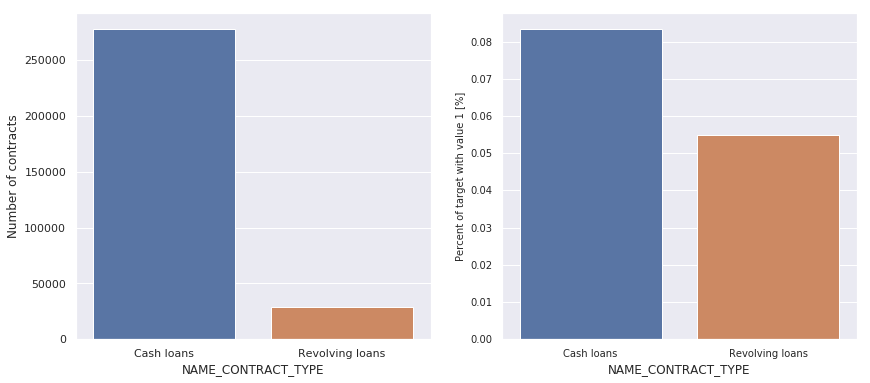

In [45]:
plot_stats('NAME_CONTRACT_TYPE', app_train)

Plotted the marital status of people currently recorded with Home Credit. It gives an idea of the type of people that are looking to get loans. It can be noticed that the married status is dominant. The repayment percentage is relatively close to one another.

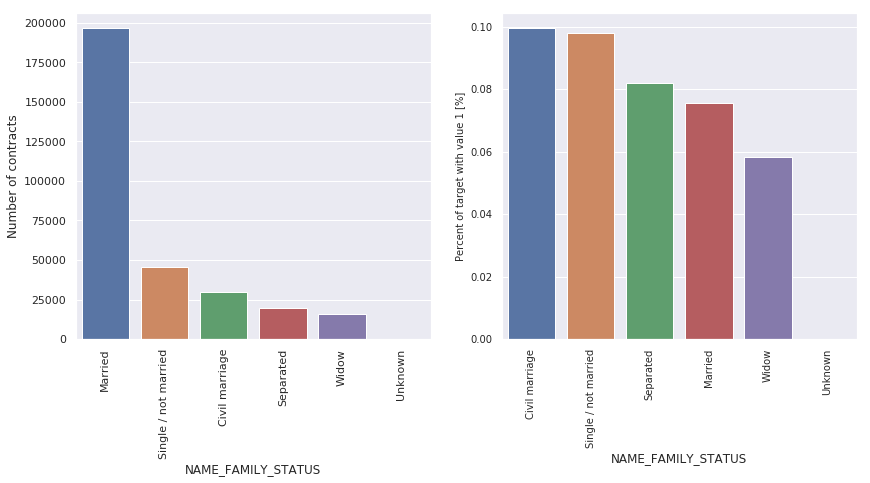

In [46]:
plot_stats('NAME_FAMILY_STATUS', app_train, True, True)

Plotted the amount of family members the clients have. It ca be noticed that families with 6 or less members (3-4 children) have a not repaying rate of 10%, while families with more than 6 members tend to not be able to repay their loans. The chances of not repaying a loan is directly proportional to the number of family members. More family members means a higher chance that the family is not able to repay their loan.

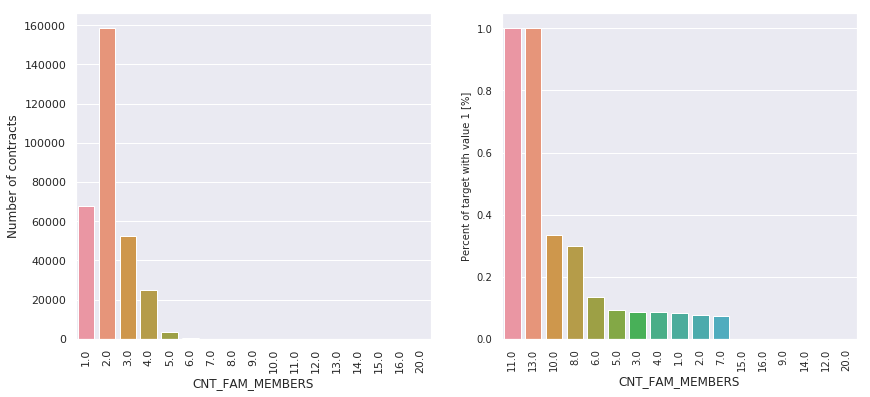

In [47]:
plot_stats('CNT_FAM_MEMBERS', app_train, True)

Graphs to illustrate the type of income of the clients. The vast majority are working, followed by commercial associates, pensioner and State servant. 

There is a high number of people not returning loans that income on Maternity leave (almost 40%), followed closely by the Unemployed (about 37%). The other types of incomes sit around the 10% mark for not returning loans.

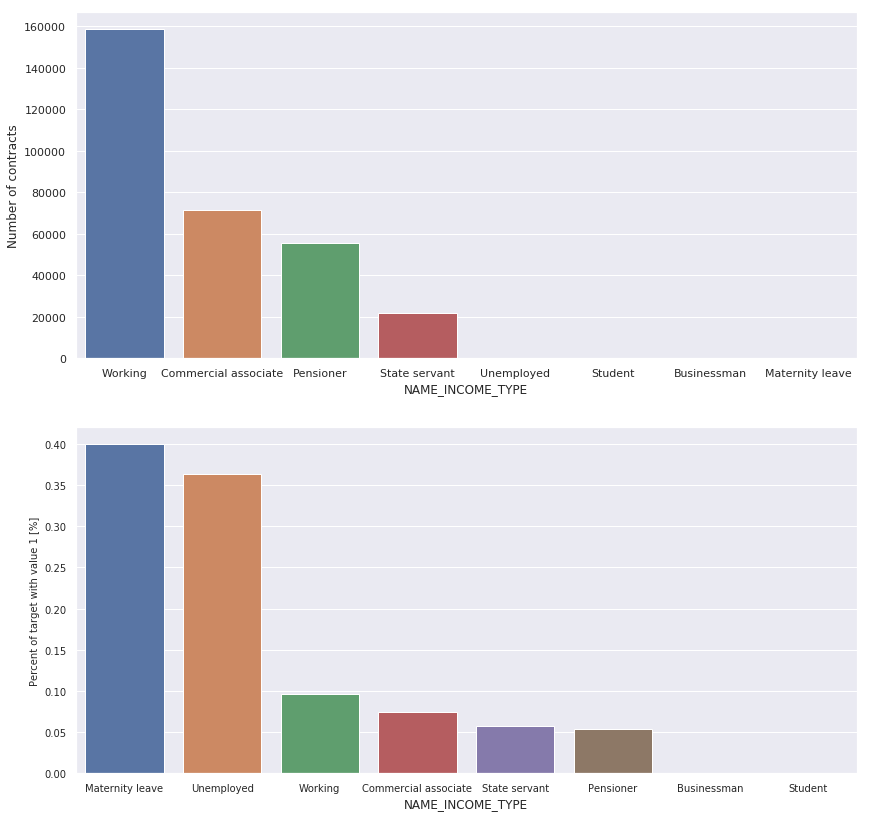

In [48]:
plot_stats('NAME_INCOME_TYPE', app_train, False, False)

Plotted two graphs of the occupation type of each of the applicants to show the field of work of most of the clients. It can be noticed that most of the clietns are working as laborers, followed by sales and core staff. It can also be noticed that people in the IT business take the lowest amount of loans.

As expected, the category that had the highest % of not being able to repain their loan are Low-skill Laborers (above 17%), followed by Drivers, Waiters, Security staff and Laborers.

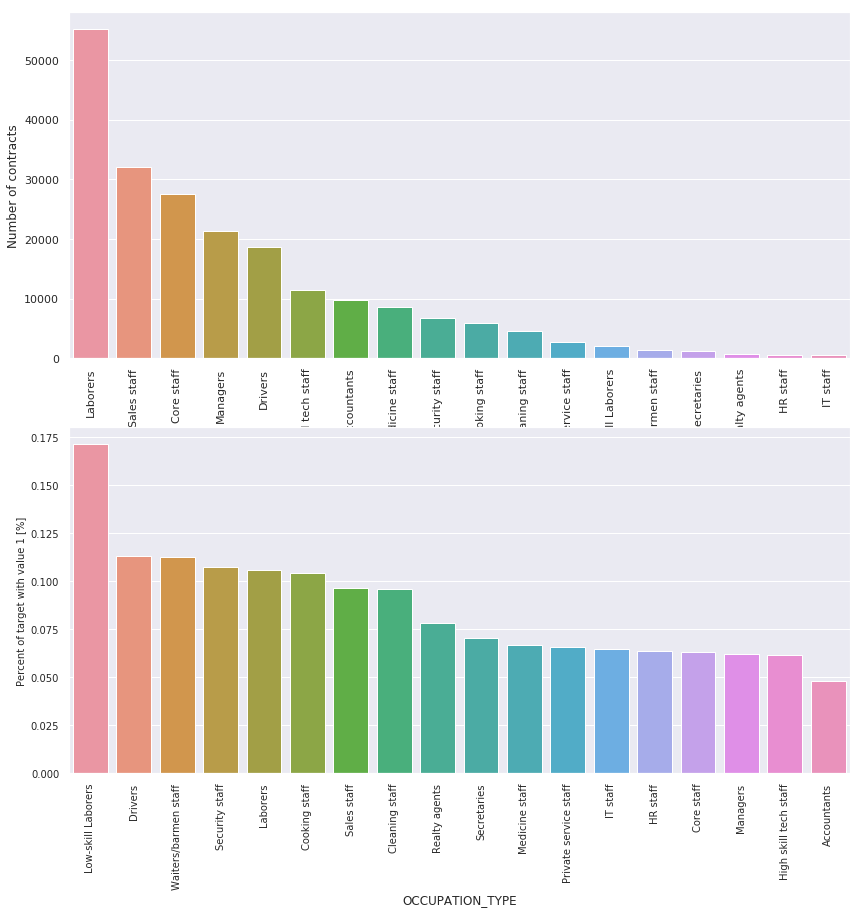

In [49]:
plot_stats('OCCUPATION_TYPE', app_train, True, False)

In [50]:
# Plot the distribution of one feature
def plot_distribution(feature, app_train, color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(), color=color, kde=True, bins=100)
    plt.show()

In [51]:
# Plot the distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var, app_train, nrow = 2):
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]
    
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow, 2, figsize=(12, 6*nrow))
    
    for feature in var:
        i += 1
        plt.subplot(nrow, 2, i)
        sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")
        plt.ylabel('Density plot', fontsize = 12)
        plt.xlabel(feature, fontsize = 12)
        locs, labels = plt.xticks()
        plt.tick_params(axis ='both', which='major', labelsize=12)
    plt.show();

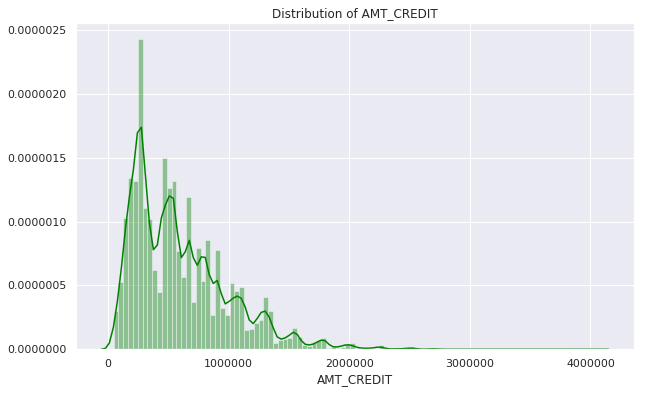

In [53]:
plot_distribution('AMT_CREDIT', app_train, 'green')

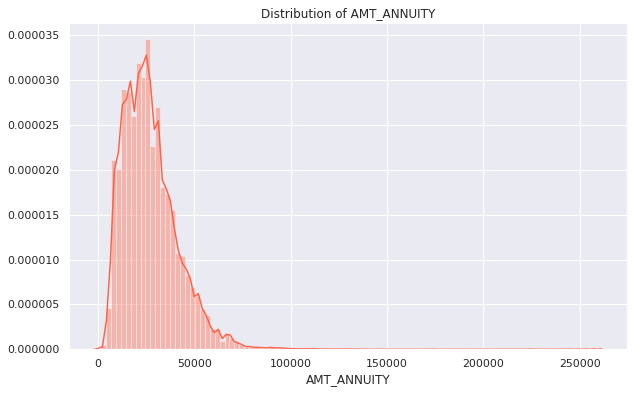

In [31]:
plot_distribution('AMT_ANNUITY', app_train, 'tomato')

It can be noticed that most of the people are registered in the city they work or live in, a very low number of contracts are from people living outside the town they live/work in. It can also be noticed that the number of people that have contracts and not work in the same city is significantly higher than those having a contract and living in the city. In both cases however, they are also more frequently not-repaying their loans compared to the ones regsitered in the same city they live in. About 10-12% of them are not repaying their loans.

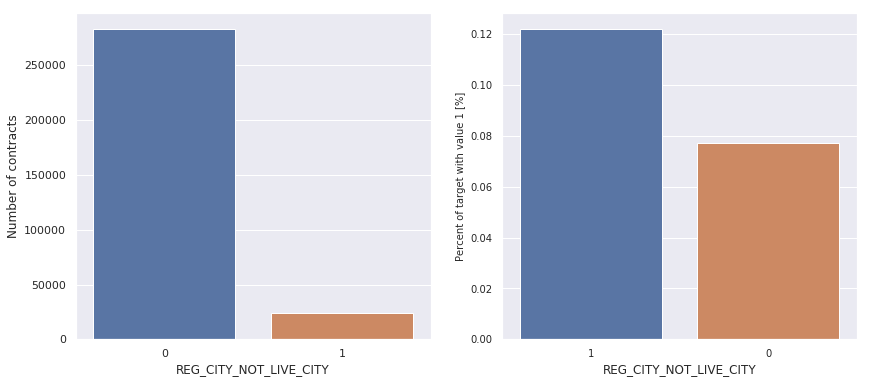

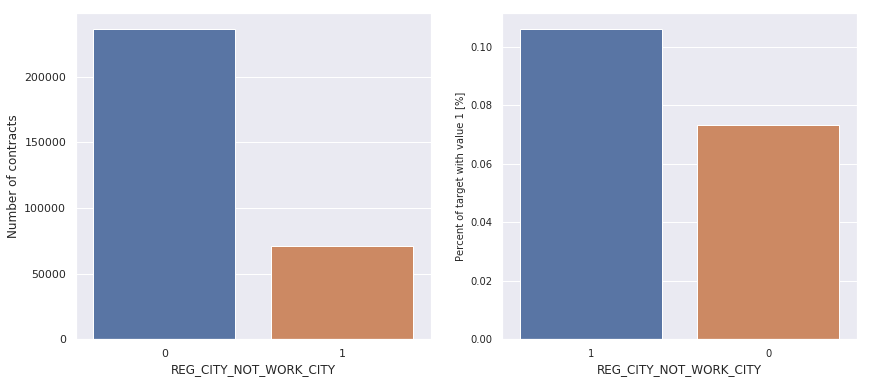

In [32]:
plot_stats('REG_CITY_NOT_LIVE_CITY', app_train)
plot_stats('REG_CITY_NOT_WORK_CITY', app_train)

Because we are dealing with a relational database, from the diagram of the database we know that the tables are connected with the key "SK_ID_CURR". We are merging the bureau table with the application_train so that we get information about the client's credits with other institution that were also reported to the Credit Bureau. This is done to get a better understanding of the financial status of the clients.

In [33]:
bureau = pd.read_csv('../input/bureau.csv')

app_train_bureau = app_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

# The dataframe is pretty big
print(app_train_bureau.shape)

(1465325, 138)


The number of contracts can be divided into a few categories: Closed, Active, Sold and Bad debt. The amount of closed contracts that were registered with the Credit Bureau are around 900.000. There are also about 550.000 currently active contracts, while Sold and bad Dept are just a few.

People that were unable to repay their loan (Bad_debt) are about 20% of the current applications. The other 3 categories both are equal or less than 10%, with Closed having the smallest rate of default.

This gives us strong information regarding our predictions, as previous registered credit history gives valuable information of whether a person will be able to repay or not a loan. The % of people defaulting with a history of Bad debt is much larger than the one for Closed.

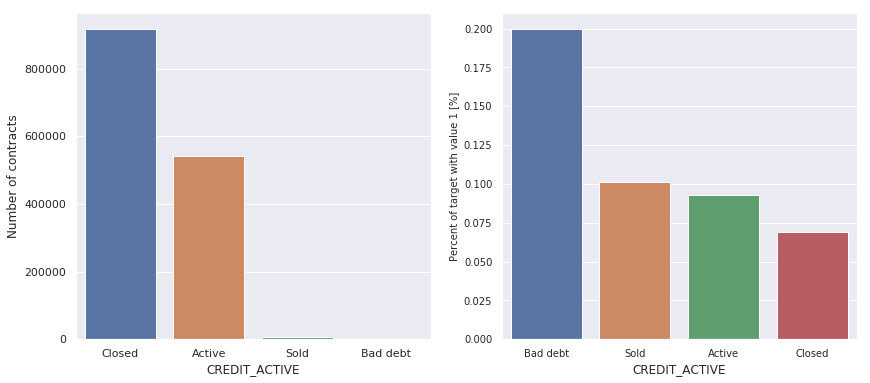

In [35]:
plot_stats('CREDIT_ACTIVE', app_train_bureau)

The two credits that stand out in the number of contracts are the consumer credit and the credit card contracts.

The others are relatively close, car loans and mortgages being the other common types of contracts.

It can also be noticed in the 2nd graph that people who ten to default are the ones who had a loan for the purchase of an equipment or a microloan (over 20%).

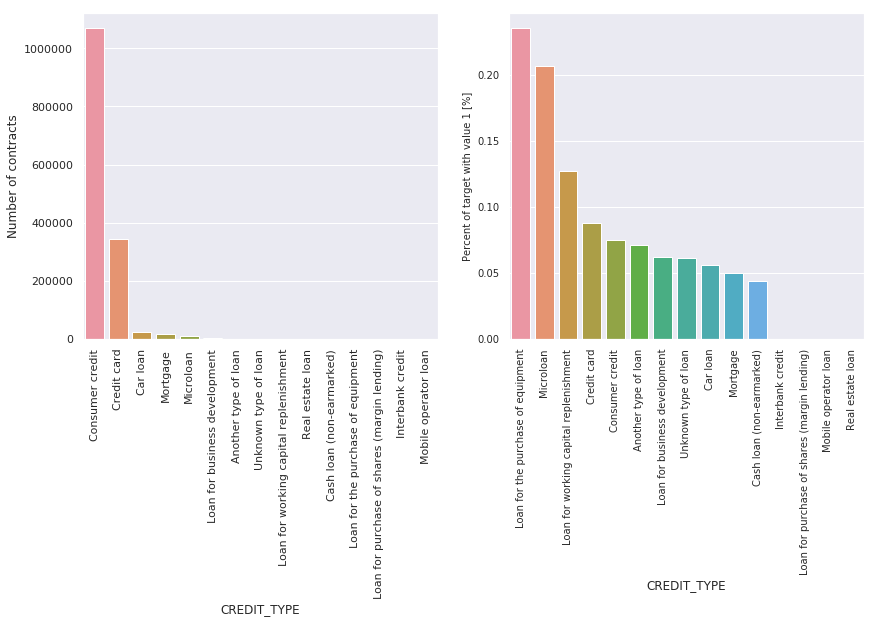

In [38]:
plot_stats('CREDIT_TYPE', app_train_bureau, True, True)

Duration of the credit in days lies in the range of 0 to almost 3000. The highest peak can be seen close to 500 days (at about 300), which means the credit is less than a year.

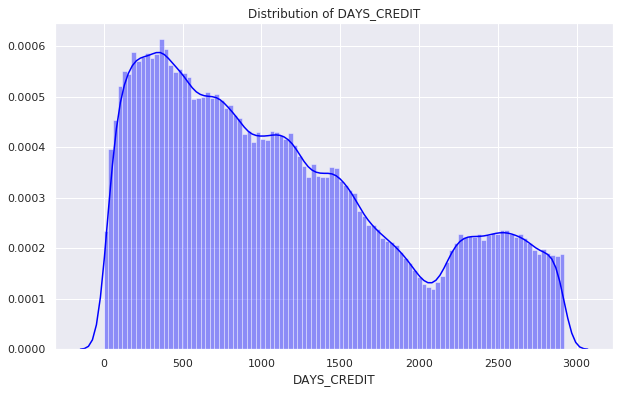

In [44]:
plot_distribution('DAYS_CREDIT', app_train_bureau, 'blue')

Continuing on what we have done before, we now merge the previous application data with our training set. An inner join is done on the common key 'SK

In [54]:
app_previous = pd.read_csv('../input/bureau.csv')

app_train_previous = app_train.merge(app_previous, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

# The dataframe is pretty big
print(app_train_previous.shape)

(1465325, 138)
